In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n_features = 10
n_dense_neurons = 3

In [4]:
x = tf.placeholder(tf.float32,shape=(None,n_features)) #shape = (rows,columns)

In [5]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons])) #matrix multiplication concept
b = tf.Variable(tf.ones([n_dense_neurons])) # each bias for each neuron

In [6]:
xW = tf.matmul(x,W)

In [7]:
z = tf.add(xW,b) #creation of computational graphs

In [8]:
a = tf.nn.relu(z)

In [9]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    out_layer = sess.run(a,feed_dict = {x : np.random.random([1,n_features])})

In [10]:
print(out_layer)

[[ 7.0358305  0.         4.3979845]]


We are not adjusting the values of B or W. We are not optimizing the weights in accordance with Cost function.

## SIMPLE REGRESSION 

In [11]:
x_data = np.linspace(0,10,10) + np.random.uniform(1,2,10)

In [12]:
x_data

array([  1.25961669,   2.45075447,   3.47465025,   5.2125398 ,
         5.80885126,   6.8953388 ,   8.56218216,   9.71008722,
        10.76478876,  11.57133557])

In [13]:
y_label = np.linspace(0,10,10) + np.random.uniform(1,3,10)

In [14]:
y_label

array([  1.1097801 ,   3.56197224,   3.31563492,   5.66307502,
         5.96491664,   7.95092819,   8.14275576,   9.59763252,
        10.85510377,  12.10156518])

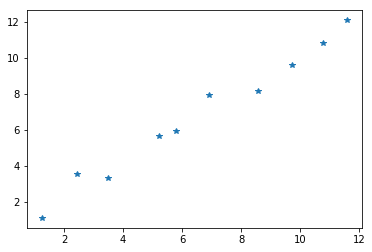

In [15]:
plt.plot(x_data,y_label,'*')

Y = Mx + B 

In [16]:
np.random.rand(2)

array([ 0.17337939,  0.9088739 ])

In [17]:
m = tf.Variable(0.88769)
b = tf.Variable(0.49481)

In [18]:
error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y - y_hat) ** 2  #MSE

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [21]:
error_min = []
with tf.Session() as sess:
    init.run()
    
    training_steps = 600
    
    for i in range(training_steps):
        sess.run(train)
        error_min.append(sess.run([error]))
           
    
    final_slope, final_intercept = sess.run([m,b])   

In [22]:
x_test = np.linspace(-1,11,10)

In [23]:
y_pred = final_slope * x_test + final_intercept

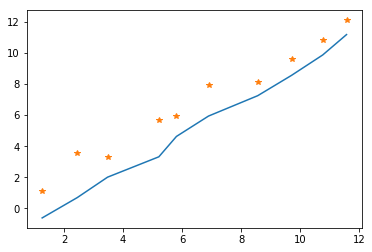

In [24]:
plt.plot(x_data,y_pred)
plt.plot(x_data,y_label,'*')

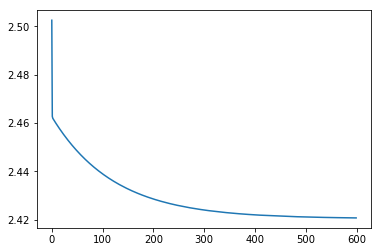

In [25]:
plt.plot(range(600),error_min)

## REGRESSION USING BATCHES

In [28]:
x_data = np.linspace(0.0,10.0,100000) # creating a huge dataset

In [29]:
noise = np.random.randn(len(x_data))

y = mx + b

b = 5

In [30]:
y_true = (0.5 * x_data) + 5 + noise

In [31]:
y_true

array([  4.06556386,   2.92575736,   3.99508774, ...,  11.27023995,
        11.08468072,   8.92010134])

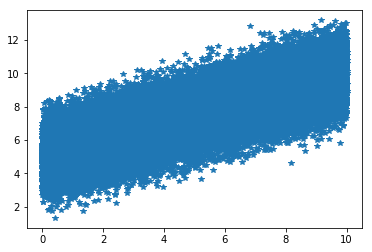

In [33]:
plt.plot(x_data, y_true,'*')

In [34]:
x_df = pd.DataFrame(data = x_data,columns=['X_Data'])
y_df = pd.DataFrame(data = y_true, columns=['Y_Data'])
df = pd.concat([x_df,y_df],axis = 1)

In [35]:
df.head()

,X_Data,Y_Data
0,0.0000,4.065564
1,0.0001,2.925757
2,0.0002,3.995088
3,0.0003,4.846617
4,0.0004,5.096179


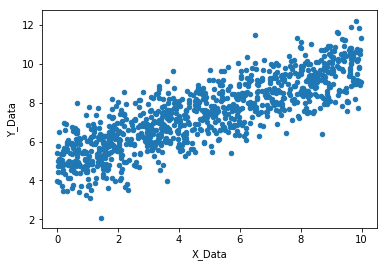

In [43]:
df.sample(n=1000).plot(kind = 'scatter',x= 'X_Data',y = 'Y_Data')

In [44]:
batch_size = 10
m = tf.Variable(0.8134)
b = tf.Variable(0.1892)

In [45]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [46]:
y_model = m*xph + b #computational graph

In [47]:
error = tf.reduce_sum(tf.square(yph - y_model)) #reducing sum of squares for batches 

In [48]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [49]:
init = tf.global_variables_initializer()

10000.0

In [62]:
error_min = []

with tf.Session() as sess:
    init.run()
    
    batches = int(len(x_data)/10)
    
    for i in range(batches):
        
        rand_int =  np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph : x_data[rand_int],yph : y_true[rand_int]}
        
        sess.run(train,feed_dict=feed)
        
    model_m , model_b = sess.run([m,b])
                

In [63]:
model_m #close to 0.5

0.50429797

In [64]:
model_b #close to 5

4.9293623

In [65]:
y_pred = x_data * model_m + model_b

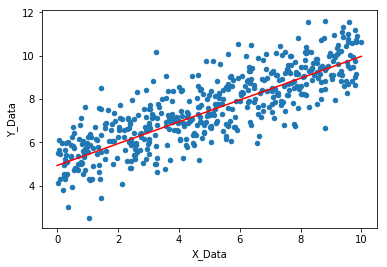

In [67]:
df.sample(n=500).plot(kind = 'scatter',x= 'X_Data',y = 'Y_Data')
plt.plot(x_data,y_pred,'r')

## REGRESSION USING TENSORFLOW USING ESTIMATOR API